In [1]:
import numpy as np
#Strange issue with matplotlib: https://github.com/matplotlib/matplotlib/issues/9294/
import matplotlib as mpl
mpl.use('TkAgg')  # or whatever other backend that you want
import matplotlib.pyplot as plt
%matplotlib inline
import sys

# Import data
All the presure measurements are in the folder data/pressures and for each angle there is a file

In [2]:
alpha = np.array([-4,0,4,8,12,16,20])

In [3]:
pressures_path = "data/pressures/"

In [4]:
pressure_files = []
for alpha_i in alpha:
    alpha_str = str(alpha_i)
    file_name = alpha_str+'.csv'
    pressure_files.append(pressures_path+file_name)

In [5]:
print(pressure_files)

['data/pressures/-4.csv', 'data/pressures/0.csv', 'data/pressures/4.csv', 'data/pressures/8.csv', 'data/pressures/12.csv', 'data/pressures/16.csv', 'data/pressures/20.csv']


In [6]:
def import_pressure_angle(data_path):
    header=np.genfromtxt(data_path, delimiter=",", max_rows=1 , dtype=str)
    x = np.genfromtxt(data_path, delimiter=",", skip_header=1)
    return header, x

In [8]:
i=1
data_path = pressure_files[i]
#Import the header
header_columns, x = import_pressure_angle(data_path)
print(header_columns)
print(np.shape(x))

['P1' 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' 'P8' 'P9' 'P10' 'P11' 'P12'
 'P_dyn upstream']
(202, 13)


In [35]:
np.shape(x[:,:N_columns-1].T/x[:,N_columns-1])

(12, 305)

In [27]:
mean_test = np.mean(x,axis=0)
print(np.shape(mean_test))

(13,)


In [11]:
N_columns = len(header_columns) 
N_measurements = np.shape(x)[0] 
N_angles = len(alpha)

In [21]:
pressures_all =[]

In [22]:
for i in range(N_angles-4):
    data_path = pressure_files[i]
    print(data_path)
    header_columns, x = import_pressure_angle(data_path)
    pressures_all.append(x)

data/pressures/-4.csv
data/pressures/0.csv
data/pressures/4.csv


In [23]:
for i in range(3,N_angles):
    data_path = pressure_files[i]
    print(data_path)
    header_columns, x = import_pressure_angle(data_path)
    pressures_all.append(x)

data/pressures/8.csv
data/pressures/12.csv
data/pressures/16.csv
data/pressures/20.csv


In [37]:
means = np.zeros((N_angles,N_columns))
stds = np.zeros((N_angles,N_columns))
means_cp = np.zeros((N_angles,N_columns-1))
stds_cp = np.zeros((N_angles,N_columns-1))
for i in range(N_angles):
    x = pressures_all[i]
    cp = (x[:,:N_columns-1].T/x[:,N_columns-1]).T
    means[i]=np.nanmean(x,axis=0)
    stds[i]=np.nanstd(x,axis=0)
    means_cp[i]=np.nanmean(cp,axis=0)
    stds_cp[i]=np.nanstd(cp,axis=0)

In [43]:
position_Pi = (np.arange(N_columns-1))
tick_labels_P = []
for j in range(len(header_columns)-1):
    header = header_columns[j]
    tick_labels_P.append(r'$'+header+'$')

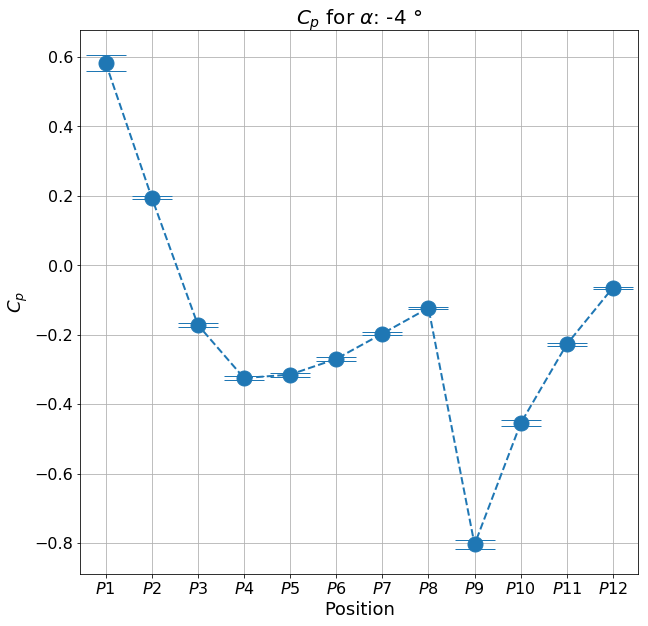

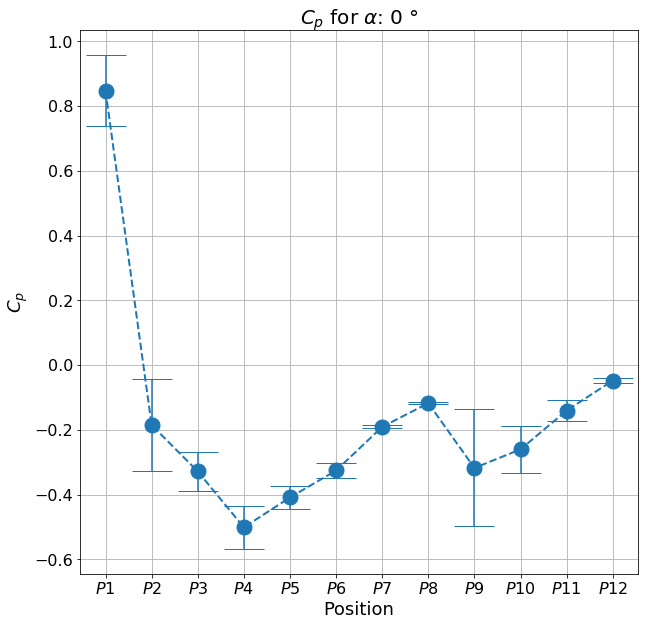

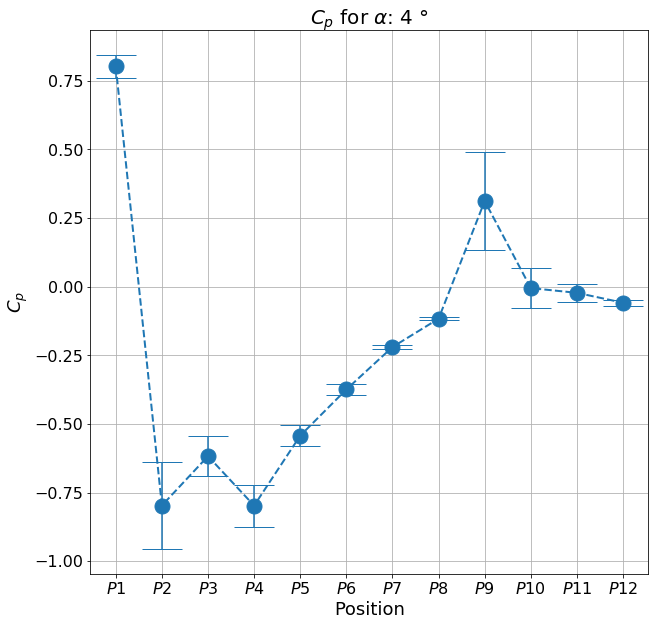

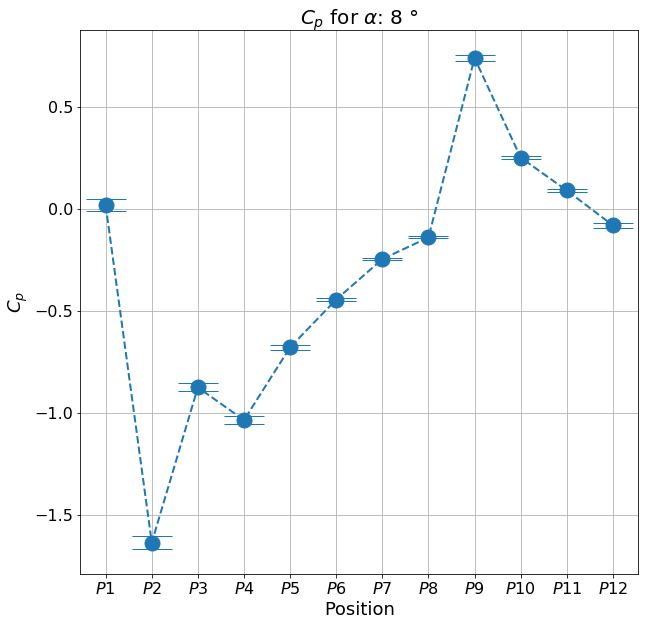

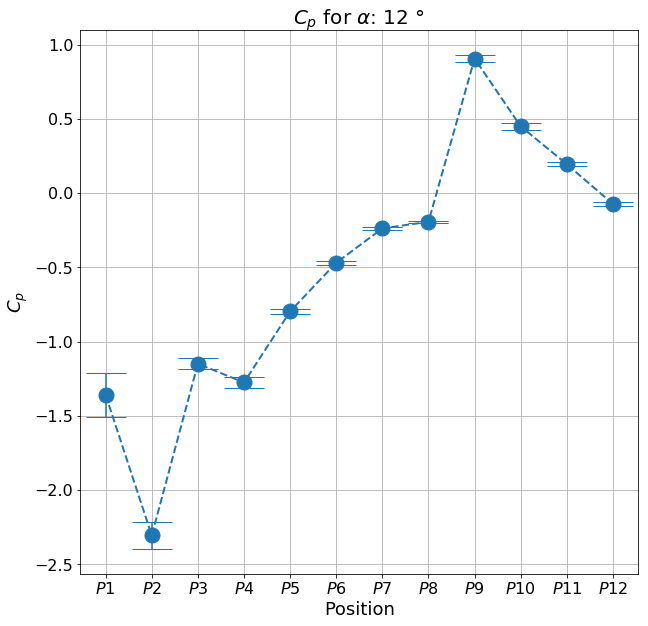

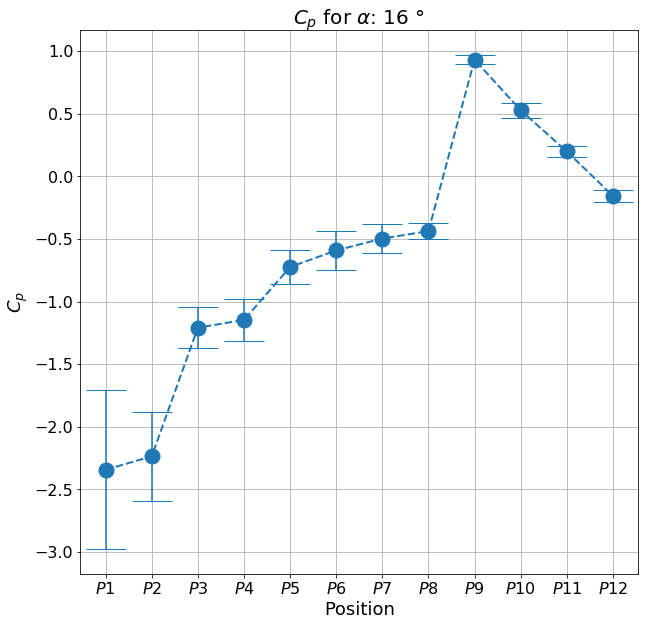

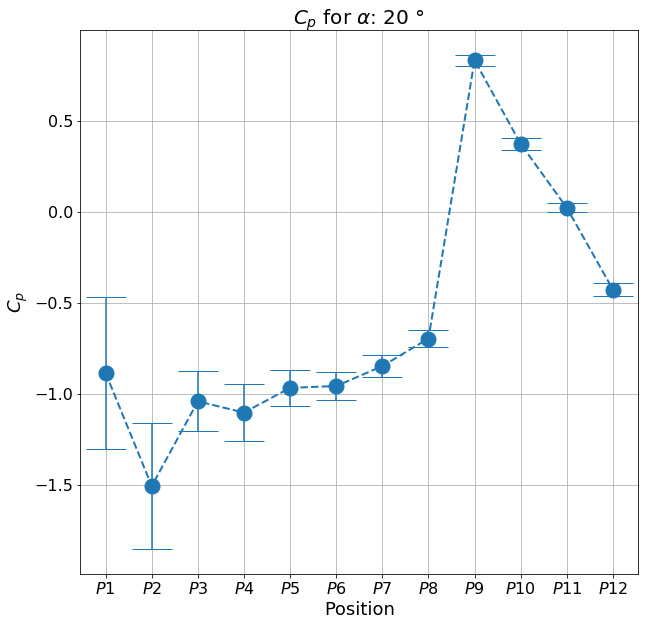

In [59]:
for j in range(N_angles):
    fig = plt.figure(figsize=(10,10))
    #plt.plot(position_Pi, means_cp[j], label=r'Mean', linewidth =4)
    #plt.fill_between(position_Pi,means_cp[j]+stds_cp[j],means_cp[j]-stds_cp[j],alpha=0.2,label =r'$\sigma$')
    plt.errorbar(position_Pi,means_cp[j],stds_cp[j],fmt='o',markersize=15, capsize=20,label=r'Mean')
    plt.gca().set_prop_cycle(None)
    plt.plot(position_Pi, means_cp[j], label=r'Mean', linewidth =2, linestyle='--')
    plt.ylabel(r'$C_p$', fontsize='18')
    plt.xlabel(r'Position',fontsize='18')
    plt.xticks(position_Pi, tick_labels_P)
    plt.tick_params(labelsize=16)
    #plt.legend(fontsize='16')
    plt.grid()
    plt.title(r'$C_p$ for $\alpha$: '+str(alpha[j])+' $\degree$', fontsize='20')
    plt.savefig("plots/cp_alpha_"+str(alpha[j])+".png")